##**MENGOLAH DATA**

In [62]:
!pip install kaggle

In [63]:
kaggle = '/content/kaggle.json'

In [64]:
!mkdir -p ~/.kaggle
!cp {kaggle} ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d olafkrastovski/handwritten-digits-0-9

Dataset URL: https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9
License(s): CC0-1.0
  0% 0.00/66.7M [00:00<?, ?B/s]
100% 66.7M/66.7M [00:00<00:00, 1.44GB/s]


In [11]:
from zipfile import ZipFile
import os
file_name = 'handwritten-digits-0-9.zip'

extract_folder = 'dataset'
os.makedirs(extract_folder, exist_ok= True)
with ZipFile(file_name, 'r') as zip:
  zip.extractall(extract_folder)
  print('Done')

Done


In [12]:
data_0 = os.listdir('/content/dataset/0')
data_1 = os.listdir('/content/dataset/1')
data_2 = os.listdir('/content/dataset/2')
data_3 = os.listdir('/content/dataset/3')
data_4 = os.listdir('/content/dataset/4')
data_5 = os.listdir('/content/dataset/5')
data_6 = os.listdir('/content/dataset/6')
data_7 = os.listdir('/content/dataset/7')
data_8 = os.listdir('/content/dataset/8')
data_9 = os.listdir('/content/dataset/9')

In [13]:
len(data_0)

2236

1. IMPORT LIBRARY

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


2. Load Data

In [51]:
from tensorflow.keras.datasets import mnist

(X_train_full, y_train_full), (X_test_full, y_test_full) = mnist.load_data()

print("X_train_full:", X_train_full.shape)
print("y_train_full:", y_train_full.shape)
print("X_test_full :", X_test_full.shape)
print("y_test_full :", y_test_full.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
X_train_full: (60000, 28, 28)
y_train_full: (60000,)
X_test_full : (10000, 28, 28)
y_test_full : (10000,)


##**3. CONTOH VISUALISASI 1 GAMBAR**

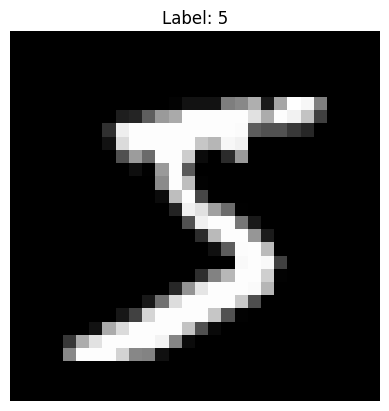

In [52]:
plt.imshow(X_train_full[0], cmap='gray')
plt.title(f"Label: {y_train_full[0]}")
plt.axis('off')
plt.show()


##**4. PREPROCESSING GAMBAR - NUMERIK (FLATTEN + NORMALIASASI)**

In [53]:
# Flatten: (N, 28, 28) -> (N, 784)
X_train_full = X_train_full.reshape(X_train_full.shape[0], -1)
X_test_full  = X_test_full.reshape(X_test_full.shape[0], -1)

# Normalisasi: 0-255 -> 0-1
X_train_full = X_train_full.astype("float32") / 255.0
X_test_full  = X_test_full.astype("float32") / 255.0

# One-hot encoding label: 0-9 -> vektor 10 kelas
y_train_full_oh = to_categorical(y_train_full, num_classes=10)
y_test_full_oh  = to_categorical(y_test_full, num_classes=10)

print("Setelah preprocessing:")
print("X_train_full:", X_train_full.shape)
print("y_train_full_oh:", y_train_full_oh.shape)


Setelah preprocessing:
X_train_full: (60000, 784)
y_train_full_oh: (60000, 10)


##**5. TRAIN TEST SPLIT**

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train_full, y_train_full_oh,
    test_size=0.2,
    random_state=42,
    stratify=y_train_full
)

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


X_train: (48000, 784)
X_test : (12000, 784)
y_train: (48000, 10)
y_test : (12000, 10)


##**6. MODELING ARSITEKTUR ANN (MLP)**

In [55]:
model = Sequential()

# Input: 784 fitur (hasil flatten)
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output: 10 kelas (0-9)
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##**7. KOMPILASI DAN SUMMARY**

In [56]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

##**8. EARLY STOPPING**

In [57]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


##**9. TRAINING**

In [58]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7180 - loss: 0.8944 - val_accuracy: 0.9397 - val_loss: 0.2061
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9201 - loss: 0.2733 - val_accuracy: 0.9526 - val_loss: 0.1570
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9409 - loss: 0.2042 - val_accuracy: 0.9584 - val_loss: 0.1381
Epoch 4/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9485 - loss: 0.1685 - val_accuracy: 0.9644 - val_loss: 0.1158
Epoch 5/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9581 - loss: 0.1421 - val_accuracy: 0.9663 - val_loss: 0.1119
Epoch 6/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9607 - loss: 0.1326 - val_accuracy: 0.9657 - val_loss: 0.1086
Epoch 7/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9650 - loss: 0.1144 - val_accuracy: 0.9698 - val_loss: 0.1026
Epoch 8/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9653 - loss: 0.1135 - val_accuracy: 0.

##**10. TESTING**

In [59]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss     :", loss)
print("Test Accuracy :", accuracy)


Test Loss     : 0.08974926918745041
Test Accuracy : 0.9744166731834412


##**11. CONFUSION MATRIX DAN CLASSIFICATION REPORT**

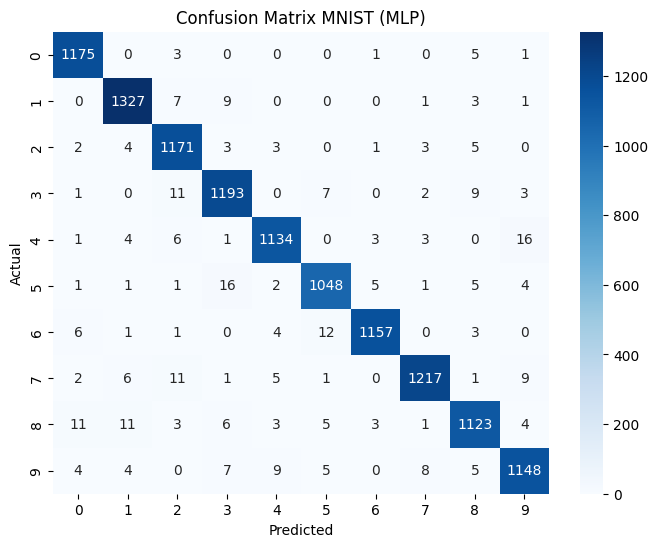

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1185
           1       0.98      0.98      0.98      1348
           2       0.96      0.98      0.97      1192
           3       0.97      0.97      0.97      1226
           4       0.98      0.97      0.97      1168
           5       0.97      0.97      0.97      1084
           6       0.99      0.98      0.98      1184
           7       0.98      0.97      0.98      1253
           8       0.97      0.96      0.96      1170
           9       0.97      0.96      0.97      1190

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



In [60]:
y_pred_prob = model.predict(X_test, verbose=0)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix MNIST (MLP)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_true, y_pred))


##**12. VISUALISASI HASIL TRAINING**

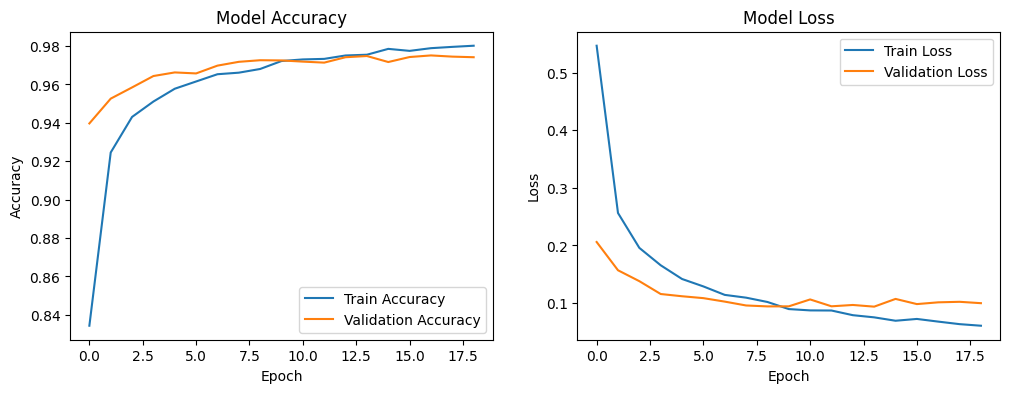

In [61]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


**ANALISIS**

Model Multilayer Perceptron (MLP) mampu mengklasifikasikan citra MNIST dengan sangat baik setelah melalui proses preprocessing berupa flatten citra, normalisasi nilai piksel, dan one-hot encoding label. Selama proses training, akurasi meningkat secara konsisten dan nilai loss menurun, yang menunjukkan bahwa model belajar dengan baik. Penggunaan dropout dan early stopping membantu mencegah overfitting, sehingga performa antara data latih dan data validasi tetap seimbang.

Hasil evaluasi pada data uji menunjukkan akurasi sekitar 97%, dengan kesalahan klasifikasi yang relatif kecil dan tersebar pada beberapa kelas digit yang memiliki bentuk visual mirip. Jika dibandingkan dengan dataset tabular kanker payudara, terlihat bahwa MLP lebih cocok untuk data citra berdimensi tinggi, sedangkan SVM lebih efisien untuk data numerik terstruktur.

**KESIMPULAN**

Berdasarkan hasil eksperimen, dapat disimpulkan bahwa MLP merupakan model yang efektif untuk klasifikasi data citra MNIST, sementara SVM lebih sesuai untuk dataset tabular. Perbedaan karakteristik data sangat memengaruhi pemilihan model. Oleh karena itu, pemilihan algoritma yang tepat sesuai jenis data menjadi faktor penting dalam memperoleh performa machine learning yang optimal.